In [1]:
from __future__ import annotations
from typing import List, Tuple, Sequence

from voronoi_site_suite import load_sites_cases, generate_sites
from viz_suite import render_sites,render_power_diagrams

In [2]:
Point = Tuple[float, float]
WPoint = Tuple[int, int, int]           # (x, y, w)
HalfPlane = Tuple[float, float, float]  # ax + by <= c

def build_power_cells(sites_in: Sequence[WPoint]) -> List[List[HalfPlane]]:
    """
    Input:  sites_in — already validated/deduped/int-cast weighted points [(x,y,w), ...]
    Output: power_regions — list of per-site half-planes.
            power_regions[i] = [(a,b,c), ...] where each (a,b,c) encodes ax+by<=c
            for the power bisector against every j != i.
    This is the pure PD step: no view, no clipping, no plotting.
    """
    n = len(sites_in)
    if n < 2:
        raise ValueError("need at least 2 sites")
    power_regions: List[List[HalfPlane]] = []
    for i in range(n):
        xi, yi, wi = sites_in[i]
        hi: List[HalfPlane] = []
        for j in range(n):
            if j == i:
                continue
            xj, yj, wj = sites_in[j]
            a = 2.0 * (xj - xi)
            b = 2.0 * (yj - yi)
            c = (xj*xj + yj*yj) - (xi*xi + yi*yi) + (wi - wj)
            hi.append((a, b, c))
        power_regions.append(hi)
    return power_regions

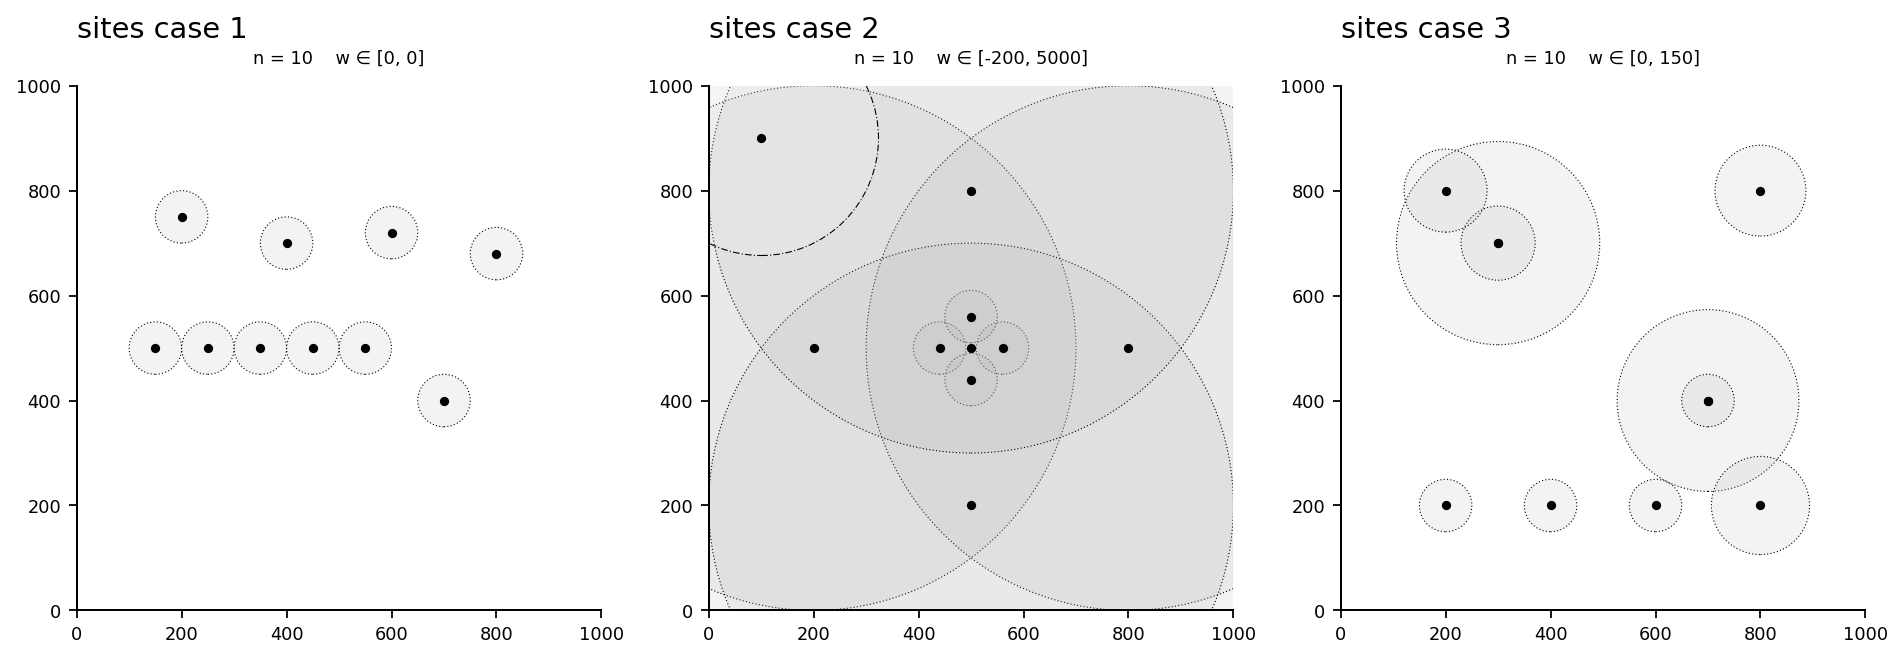

In [3]:
Sites = load_sites_cases()   
fig1 = render_sites(Sites, coord_range=1000, cols_per_row=3)

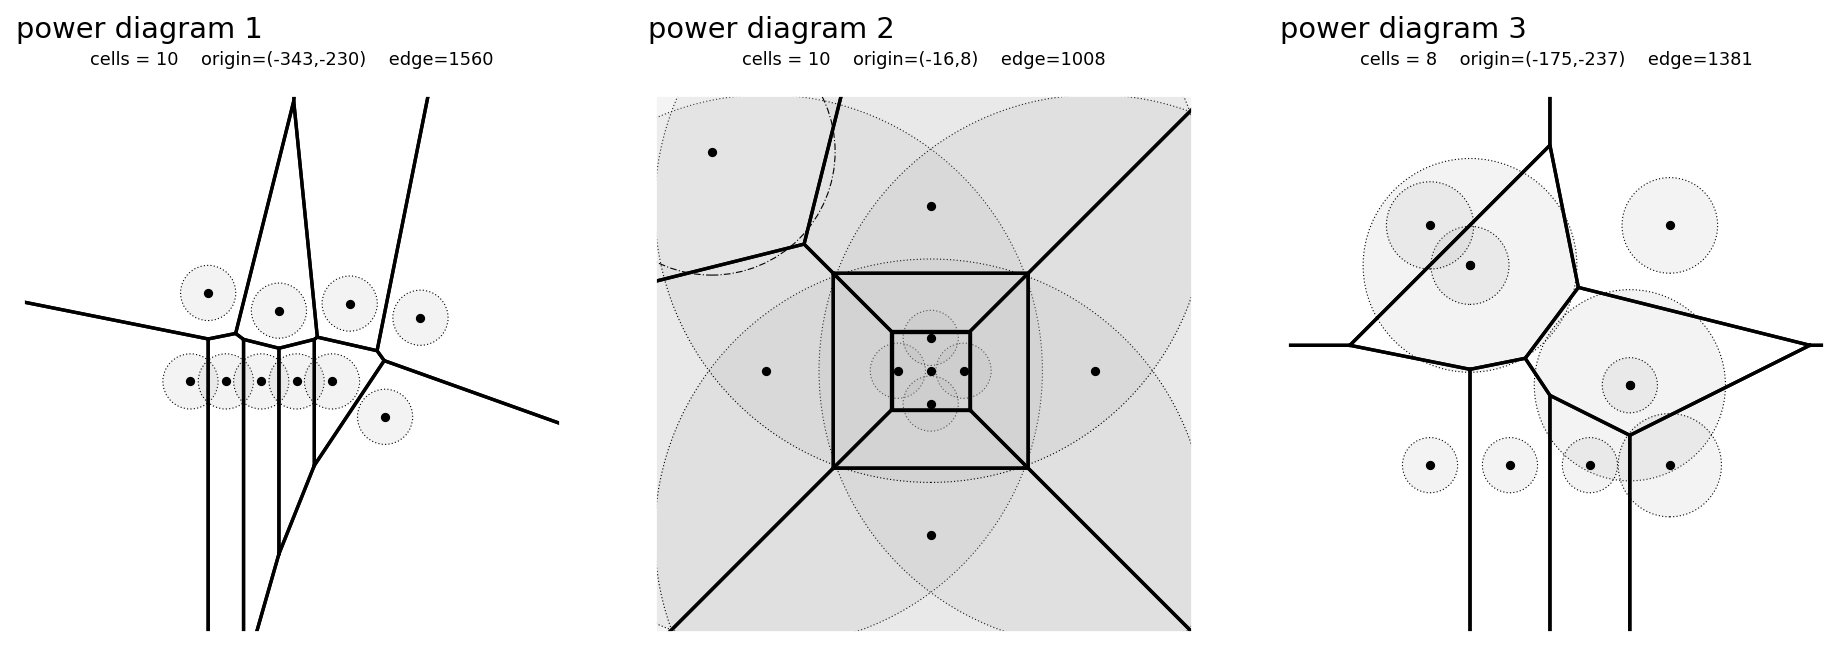

In [4]:
PRs = [build_power_cells(S) for S in Sites]
fig_pow = render_power_diagrams(Sites, PRs, cols_per_row=3, max_expand=2.0)

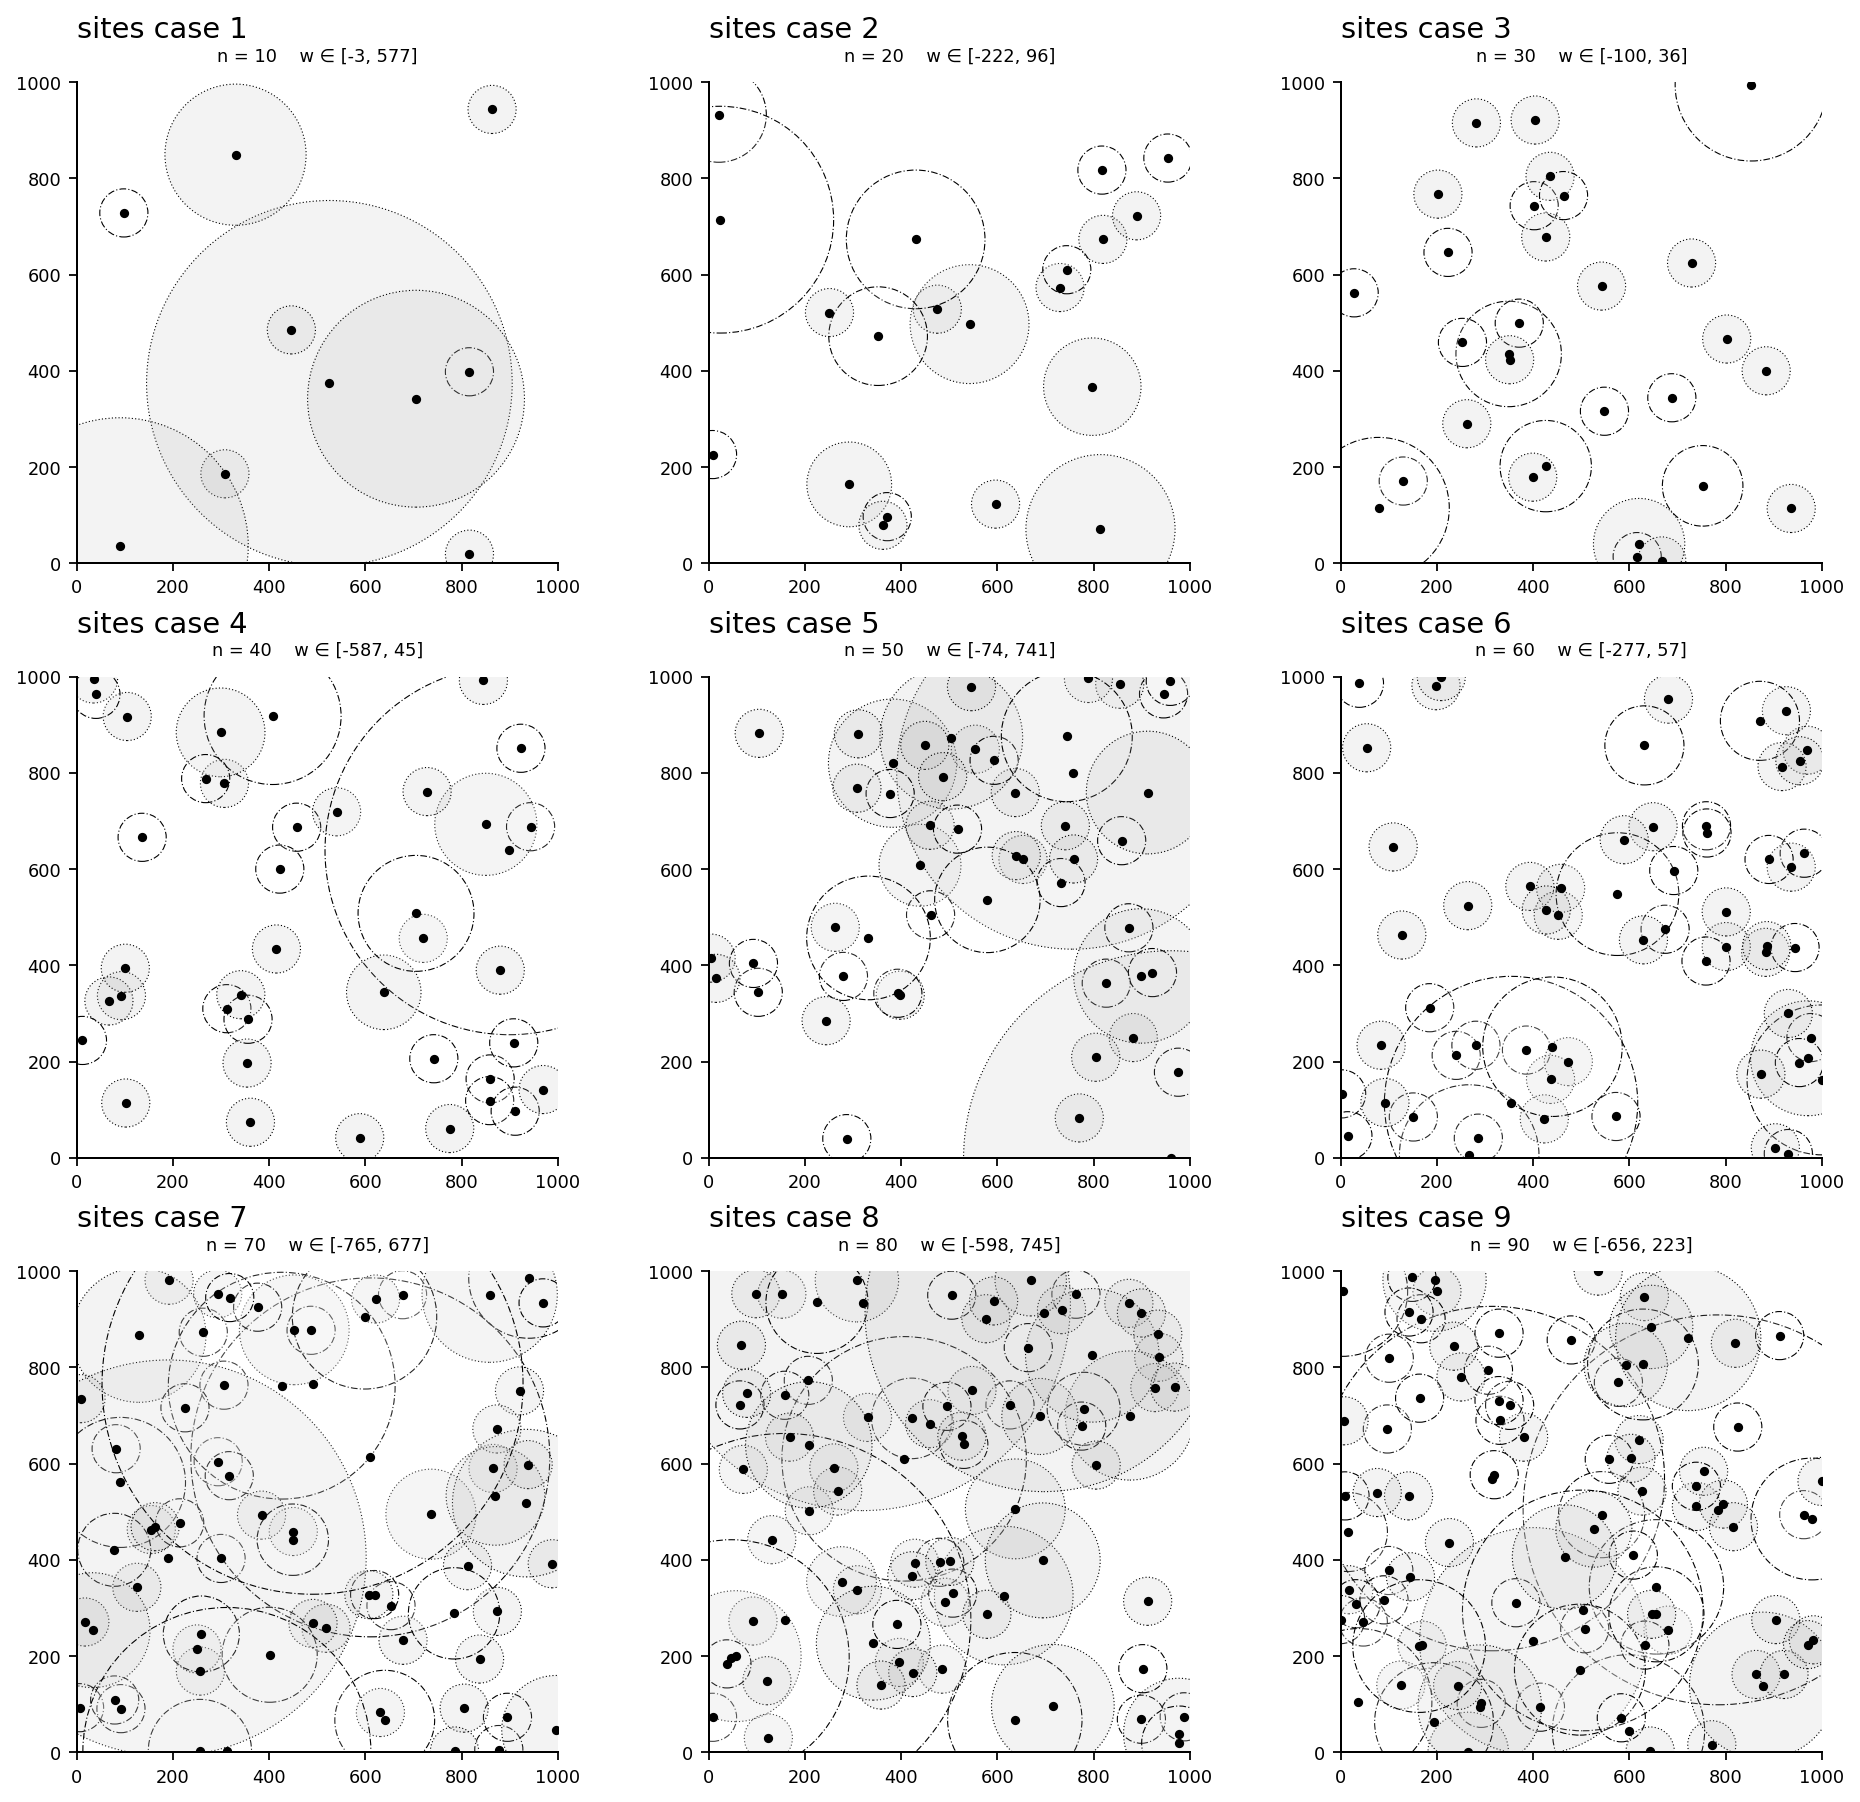

In [5]:
# TestSites = generate_sites([3,6,9,12,15,18,21,24,27], image_size=1000)
TestSites = generate_sites([10,20,30,40,50,60,70,80,90], image_size=1000,seed=1024)
fig3 = render_sites(TestSites, coord_range=1000, cols_per_row=3)

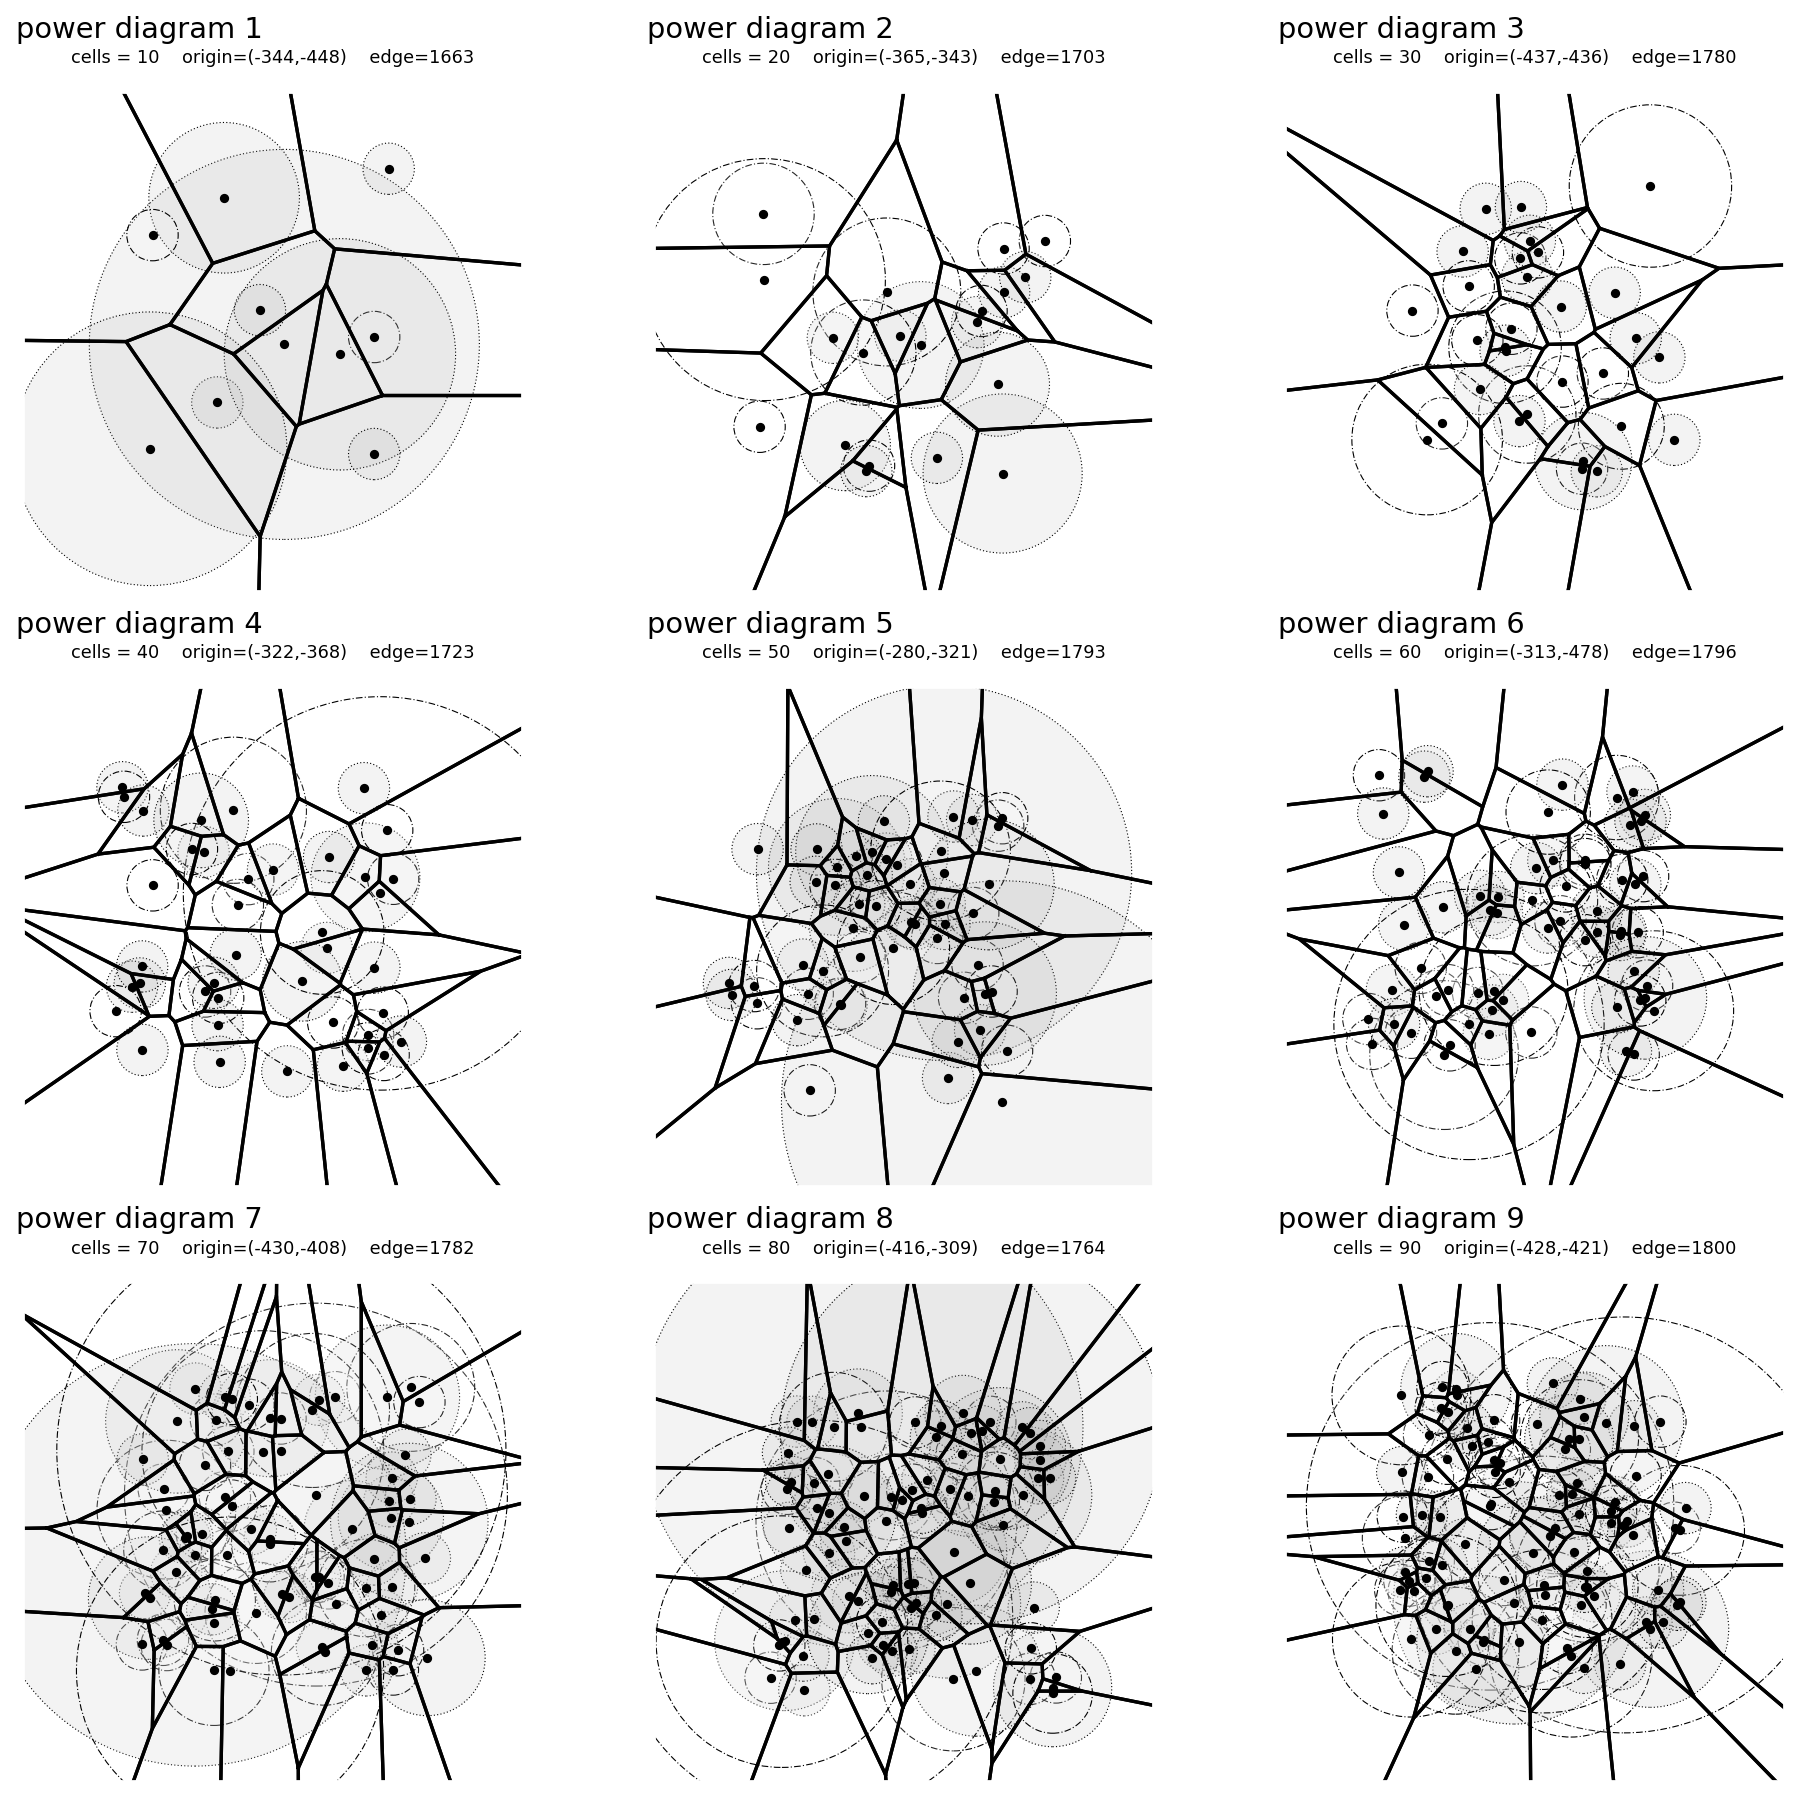

In [6]:
TestPRs = [build_power_cells(TS) for TS in TestSites]
fig4 = render_power_diagrams(TestSites, TestPRs, cols_per_row=3, max_expand=1.5)